In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

In [4]:
# Loading data
df = pd.read_csv('E:/datasets/pokemon/Pokemon.csv')

columns = df.columns.tolist()
columns[0] = 'id'
df.columns = columns

cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [5]:
df.head()

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
scaler = StandardScaler().fit(df[cols])
df_scaled = scaler.transform(df[cols])

pca = PCA(n_components=0.8)  # consider enough components to explain 80% of the variance
pca.fit(df_scaled)
pcscores = pd.DataFrame(pca.transform(df_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

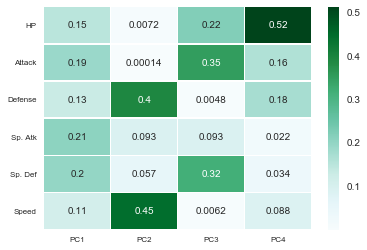

In [10]:
load_sqr = loadings**2
ax = sns.heatmap(load_sqr.transpose(), linewidths=0.5, cmap="BuGn", annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)

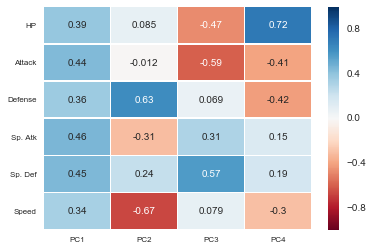

In [11]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)

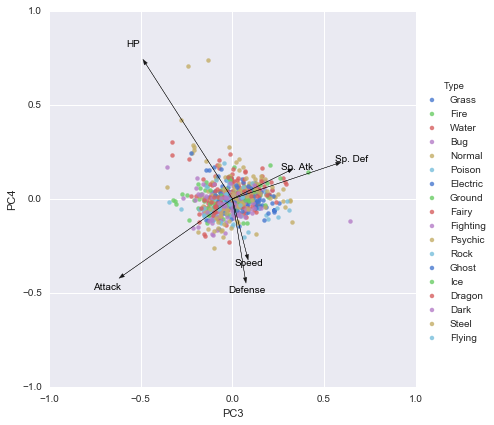

In [12]:
# Create labels based on Type 1
labels = set(df['Type 1'])
df['type'] = df['Type 1']
lab_dict = dict()
for i, elem in enumerate(labels):
    lab_dict[elem] = i
df = df.replace({'type' : lab_dict})

pc_types = pcscores.copy()
pc_types['Type'] = df['Type 1']

# Biplots
def make_plot(pcscores, loadings, xval=0, yval=1, max_arrow=0.2, alpha=0.4):
    n = loadings.shape[1]
    scalex = 1.0 / (pcscores.iloc[:, xval].max() - pcscores.iloc[:, xval].min())  # Rescaling to be from -1 to +1
    scaley = 1.0 / (pcscores.iloc[:, yval].max() - pcscores.iloc[:, yval].min())

    pcscores.iloc[:, xval] = pcscores.iloc[:, xval] * scalex
    pcscores.iloc[:, yval] = pcscores.iloc[:, yval] * scaley

    g = sns.lmplot(x='PC{}'.format(xval + 1), y='PC{}'.format(yval + 1), hue='Type', data=pcscores,
                   fit_reg=False, size=6, palette='muted')

    for i in range(n):
        # Only plot the longer ones
        length = sqrt(loadings.iloc[xval, i] ** 2 + loadings.iloc[yval, i] ** 2)
        if length < max_arrow:
            continue

        plt.arrow(0, 0, loadings.iloc[xval, i], loadings.iloc[yval, i], color='k', alpha=0.9)
        plt.text(loadings.iloc[xval, i] * 1.15, loadings.iloc[yval, i] * 1.15,
                 loadings.columns.tolist()[i], color='k', ha='center', va='center')

    g.set(ylim=(-1, 1))
    g.set(xlim=(-1, 1))
    
make_plot(pc_types, loadings, 2, 3, max_arrow=0.3)

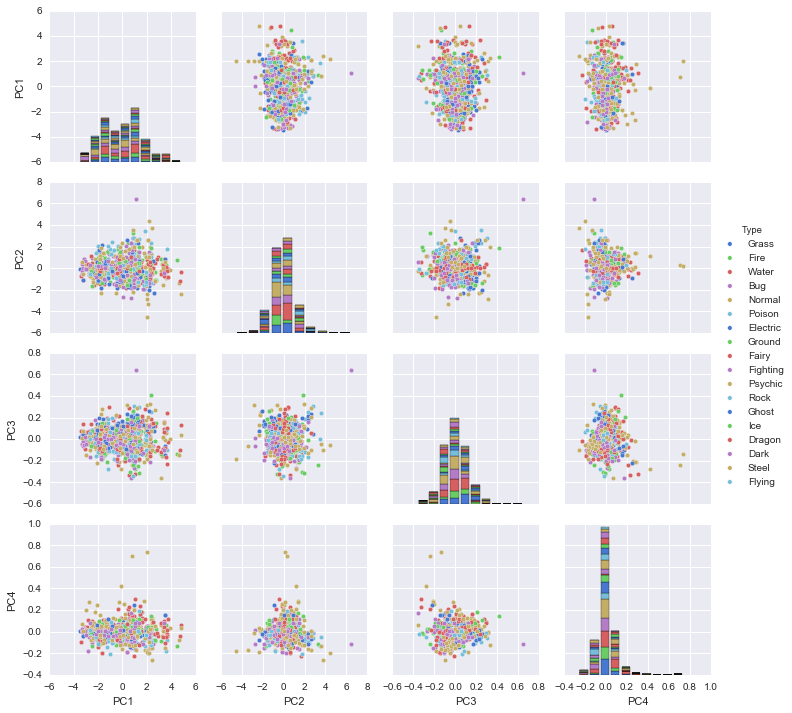

In [14]:
g = sns.pairplot(pc_types, hue='Type', palette='muted')

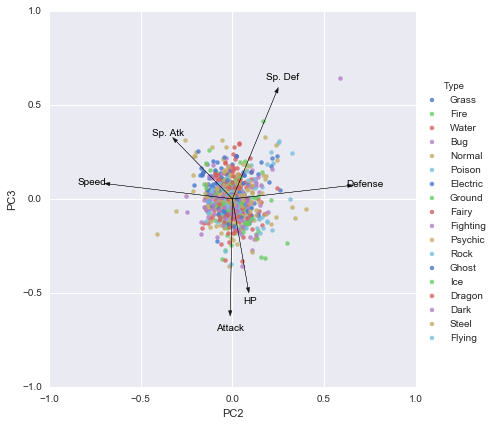

In [15]:
make_plot(pc_types, loadings, 1, 2, max_arrow=0.3)